# Inferential Statistics

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 10**

Selasa, 15 Juni 2021 • 19:00 - 22:00 WIB

- Distribusi Variabel Acak
- Interval Kepercayaan
- Pengujian Hipotesis

***

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

## Random Variable

Variabel yang kemungkinan nilainya merupakan hasil numerik dari fenomena acak. Ada dua jenis variabel acak: diskrit dan kontinu.

1.  Diskrit \
    Variabel yang mungkin hanya mengambil sejumlah nilai berbeda yang dapat dihitung dan dengan demikian dapat dikuantifikasi.


2.  Kontinu \
    Variabel yang mengambil jumlah kemungkinan nilai tak terbatas.


### Uniform Distribution

In [2]:
from scipy.stats import uniform

data_uniform = uniform.rvs(size=10000, loc=10, scale=20)
print(data_uniform)

[23.13524111 20.41367419 24.19861806 ... 27.83128593 25.1085308
 12.77417665]


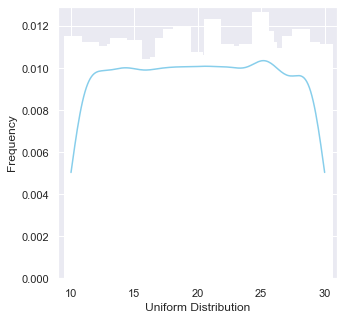

In [3]:
sns.histplot(x=data_uniform, stat='probability', bins=100, kde=True, color='skyblue', alpha=1, linewidth=15)
plt.xlabel('Uniform Distribution')
plt.ylabel('Frequency')
plt.show()

### Normal Distribution

In [4]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000, loc=0, scale=1)
print(data_normal)

[ 0.57222126  1.69479085 -0.50821728 ... -0.16842467  0.78794366
  2.2634501 ]


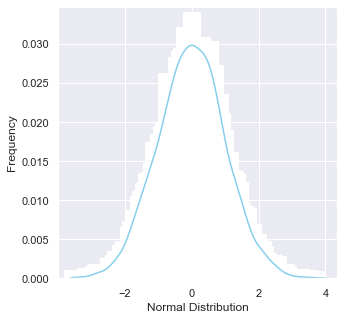

In [5]:
sns.histplot(x=data_normal, stat='probability', bins=100, kde=True, color='skyblue', alpha=1, linewidth=15)
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')
plt.show()

### Gamma Distribution

In [6]:
from scipy.stats import gamma

data_gamma = gamma.rvs(size=10000, a=5)
print(data_gamma)

[ 5.02843161 11.31794776  7.59708247 ...  6.25869673  4.35549815
  4.4297701 ]


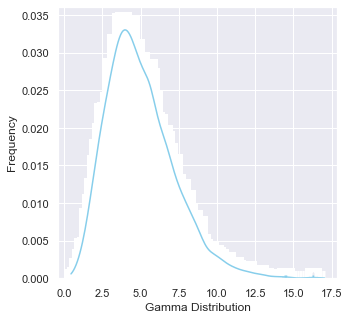

In [7]:
sns.histplot(x=data_gamma, stat='probability', bins=100, kde=True, color='skyblue', alpha=1, linewidth=15)
plt.xlabel('Gamma Distribution')
plt.ylabel('Frequency')
plt.show()

### Exponential Distribution

In [8]:
from scipy.stats import expon

data_expon = expon.rvs(size=10000, loc=0, scale=1)
print(data_expon)

[0.16727905 1.13434806 0.17018962 ... 1.68012475 4.30735715 2.91611212]


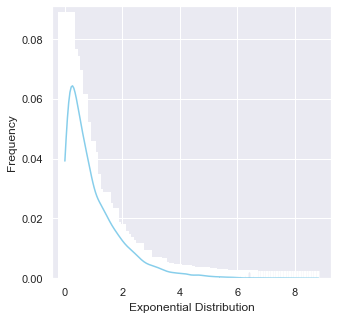

In [9]:
sns.histplot(x=data_expon, stat='probability', bins=100, kde=True, color='skyblue', alpha=1, linewidth=15)
plt.xlabel('Exponential Distribution')
plt.ylabel('Frequency')
plt.show()

### Poisson Distribution

In [10]:
from scipy.stats import poisson

data_poisson = poisson.rvs(size=10000, mu=3)
print(data_poisson)

[5 7 2 ... 4 3 1]


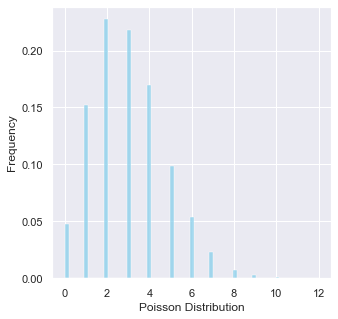

In [11]:
sns.histplot(x=data_poisson, stat='probability', color='skyblue')
plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')
plt.show()

### Binomial Distribution

In [12]:
from scipy.stats import binom

data_binom = binom.rvs(size=10000, n=10, p=.2)
print(data_binom)

[2 2 2 ... 3 2 0]


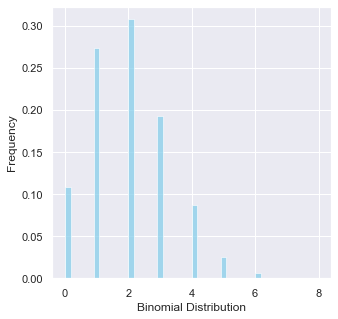

In [13]:
sns.histplot(x=data_binom, stat='probability', color='skyblue')
plt.xlabel('Binomial Distribution')
plt.ylabel('Frequency')
plt.show()

### Bernoulli Distribution

In [14]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=10000, p=.6)
print(data_bern)

[1 1 0 ... 1 0 0]


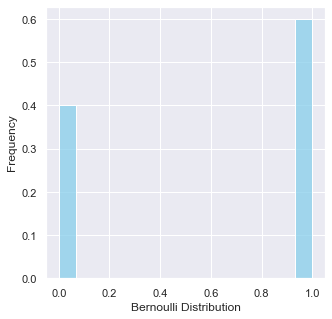

In [15]:
sns.histplot(x=data_bern, stat='probability', color='skyblue')
plt.xlabel('Bernoulli Distribution')
plt.ylabel('Frequency')
plt.show()

---

## Confidence Intervals (CI)

Rentang antara dua nilai di mana nilai suatu _sample mean_ tepat berada di tengah-tengahnya

### Interval kepercayaan untuk proporsi populasi

Menggunakan [dataset penyakit jantung](https://www.kaggle.com/johnsmith88/heart-disease-dataset):

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/Heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Ganti `1` dan `0` menjadi `Male` dan `Female` di kolom baru `sex1`

In [17]:
df['sex1'] = df.sex.replace({1: 'Male', 0: 'Female'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Female


Drop _missing values_:

In [18]:
dx = df[['target', 'sex1']].dropna()
dx

,target,sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female
...,...,...
1020,1,Male
1021,0,Male
1022,0,Male
1023,1,Female


Untuk mendapatkan jumlah yang memiliki penyakit jantung:

In [19]:
dxt = pd.crosstab(dx.target, dx.sex1)
dxt

sex1,Female,Male
target,,
0,86,413
1,226,300


Menghitung jumlah populasi dan proporsi penduduk wanita yang menderita penyakit jantung:

In [20]:
total_female = dxt['Female'].values.sum()
prop_female = dxt['Female'][1] / total_female

print('Total:', total_female)
print('Proporsi:', prop_female)

Total: 312
Proporsi: 0.7243589743589743


Menghitung _standard error_:

In [21]:
se_female = np.sqrt(prop_female * (1 - prop_female) / total_female)
print('SE:', se_female)

SE: 0.02529714756803247


Membuat CI dengan _z-score_ = 1.96 dan _confidence interval_ 95%

In [22]:
z_score = 1.96
lower_ci = prop_female - z_score * se_female
upper_ci = prop_female + z_score * se_female

print('Convidence interval:', lower_ci, upper_ci)

Convidence interval: 0.6747765651256307 0.773941383592318


Lebih singkat dengan menggunakan _library_ `statsmodels`:

In [23]:
import statsmodels.api as sm

sm.stats.proportion_confint(total_female * prop_female, total_female)

(0.6747774762140357, 0.773940472503913)

_That means the true proportion will fall between that lower number to upper number._

### Perhitungan interval kepercayaan rata-rata

Menggunakan dataset yang sama dengan kolom `chol` yang berisi tingkat kolestrol.

Mendapatkan mean, standard deviation, dan population size:

In [24]:
dgc = df.groupby("sex1").agg({"chol": [np.mean, np.std, np.size]})
dgc

chol                
              mean        std size
sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

Mengekstrak parameter yang diperlukan hanya untuk populasi wanita:

In [25]:
mean_female = dgc.loc['Female', 'chol']['mean']
sd_female = dgc.loc['Female', 'chol']['std']
total_female = dgc.loc['Female', 'chol']['size']
z_score = 1.96

print(mean_female, sd_female, total_female)

261.45512820512823 64.46678079217996 312.0


Menghitung _standard error_ menggunakan rumus _standard error of the mean_:

In [26]:
se_mean_female = sd_female / np.sqrt(total_female)
print(se_mean_female)

3.6497127678109655


Konstruksi CI:


In [27]:
lower_ci = mean_female - z_score * se_mean_female
upper_ci = mean_female + z_score * se_mean_female

print('Convidence interval:', lower_ci, upper_ci)

Convidence interval: 254.30169118021874 268.6085652300377


_That means the true mean of the cholesterol of the female population will fall between that lower number to upper number._

### Data Berat Penduduk Dalam Satuan Pound

In [28]:
np.random.seed(42)

normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)

all_mass_values = np.concatenate((
    normal_distribution_us_male_mass_pounds, 
    normal_distribution_us_female_mass_pounds
), axis=0)

df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


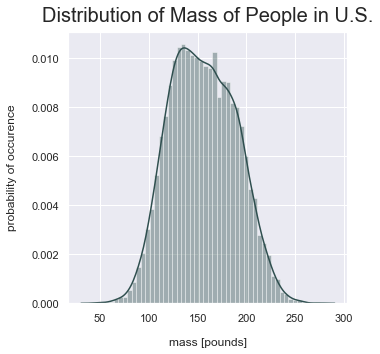

In [29]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

In [31]:
# Calculation Population Mean
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.42328059423372

In [32]:
# Calculate Population Standard Deviation
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.58519088395858

In [33]:
sample_means = []
n = 25
for sample in range(0, 300):
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency of occurence')

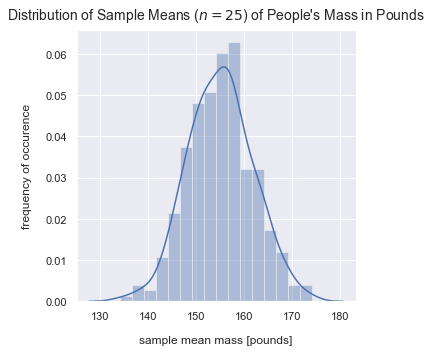

In [37]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=14)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

In [38]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

155.3008268518431

In [39]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [41]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

In [42]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791716

In [45]:
tail = 1 - norm.cdf(1.96)
tail

0.024997895148220484

In [46]:
1 - (tail * 2)

0.950004209703559

In [47]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

141.95878847542738

In [48]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

168.28957812845093

Text(0, 0.5, 'frequency of occurence')

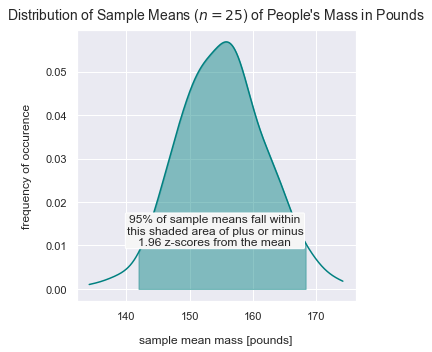

In [60]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=12, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=14)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)

---

## Hypothesis Testing

Cara menguji hasil survei atau eksperimen untuk melihat apakah kita memiliki hasil yang bermakna.

### Proporsi Satu Populasi

**Research Question:**

Pada tahun-tahun sebelumnya, 52% orang tua percaya bahwa elektronik dan media sosial adalah penyebab kurang tidur remaja mereka. Apakah saat ini semakin banyak orang tua yang percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial?

Population: Orang tua dengan remaja (usia 13-18)<br>
Parameter of Interest: p

Null Hypothesis: p = 0.52<br>
Alternative Hypthosis: p > 0.52 (note that this is a one-sided test)

Data: 1018 orang disurvei. 56% dari mereka yang disurvei percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial.

In [30]:
n = 1018
pnull = .52
phat = .56

sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

Karena nilai p-value dari z-test cukup kecil, kita dapat **reject the null hypothesis** bahwa persentase orang tua yang percaya bahwa kurang tidur remaja mereka disebabkan oleh elektronik dan media sosial sama dengan tahun-tahun sebelumnya. Perkiraan yaitu 52%.

Meskipun, kita tidak menerima hipotesis alternatif, secara informal berarti bahwa ada kemungkinan besar proporsi ini lebih dari 52%.